# Homework 9 (solution)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

## Chapter 9, Exercise 1

The following reaction involves both a general-acid and a general-base catalyst in water. Yet, a bell-shaped $\log k_{obs}$ vs. pH profile is not found. Derive the rate expression and explain why the reaction does not lead to a bell-shaped pH dependence. How is this reaction fundamentally different from the reactions that would show a bell-shaped  $\log k_{obs}$ vs. pH profile? What kind of catalysis would the kinetic express ion you derived lead a researcher to propose for this reaction?

![title](HW9-9.1.png)


*Solution:*

We can assume that the second step is rate-determining and apply the steady-state approximation.The rate of product (acetic acid) formation is as follows:

$$\frac{d[P]}{dt} = k_2[I][HB^+]$$

Rate law for intermediate formation follows and we apply the steady-state approximation:

$$\frac{d[I]}{dt} = k_1[R][B] - k_{-1}[I][HB^+] - k_2[I][HB^+] = 0$$

$$[I] = \frac{k_1[R][B]}{\left(k_{-1} + k_2\right)[HB^+]}$$

Plugging this into the first equation we get

$$\frac{d[P]}{dt} =  \frac{k_1k_2}{k_{-1} + k_2}[R][B]$$

In this way, the $[HB^+]$ term dropped out of the overall rate and the rate only depends on general base $[B]$ concentration. Therefore the reaction is kinetically equivalent to that of if we assumed the first step to be RDS. In reality, the reaction is catalyzed by specific base (fast preequilibrium) and general acid (slow RDS) (see page 514 - 515 Anslyn about kinetic equivalency). The bell-shaped pH dependence would be observed if the rate depended on both general base and general acid (see page 515-516 Anslyn).

## Chapter 9, Exercise 12

Each of the mechanisms from Exercise 10 were supported by careful kinetic measurements performed for this enolization by Hegarty and Jencks in 1975. In other words, all these different forms of catalysis can operate simultaneously, the extent of each pathway being determined by the pH and the concentrations of the general acids and general bases. Correspondingly, the rate law looks like the following:

$$\text{rate} = [\text{acetone}]\left(k_{H^+}[H_3O^+] + k_{HA}[HA] + k_{OH^-}[OH^-] + k_B[B]\right)$$

Draw the separate pH versus $\log(k_{obs})$ kinetic plots, one for each term in this expression. To do this, incorporate the hydronium, hydroxide, general-acid ($\mathrm pK_{\mathrm a}$ of 7.0), and general-base (conjugate acid $\mathrm pK_{\mathrm a}$  of 7.0) concentration into the rate constants to give a $\log(k_{obs})$ for each of these four terms.

*Solution:*
Acid dissociation constant:
$$K_a=\frac{[H_3O^+][A^-]}{[HA]}$$
Mass balance equation (analytical acid concentration consist of dissociated and undissociated part):
$$[HA]_0 = [HA] + [A^-]$$

$$\mathrm pK_{\mathrm a} = -\log K_a = 7.0$$

$$pH = -\log [H_3O^+]$$

$$pH + pOH = pK_w \approx 14$$

Lets plug the derived terms into the original equation:

$$\text{rate} = [\text{acetone}]\left(k_{H^+}10^{-pH} + k_{HA}[HA]_0\frac{1}{1+10^{pH-pK_a}} + k_{OH^-}10^{pH - pK_w} + k_B[B]_0\frac{1}{1+10^{pK_a-pH}}\right)$$

Separately, we can write: 

\begin{align}
k_{obs}^{(1)} &= k_{H^+}10^{-pH} \\
k_{obs}^{(2)} &= k_{HA}[HA]_0\frac{1}{1+10^{pH-pK_a}} \\
k_{obs}^{(3)} &= k_{OH^-}10^{pH - pK_w} \\
k_{obs}^{(4)} &= k_B[B]_0\frac{1}{1+10^{pK_a-pH}}
\end{align}

Because these are just a qualitative plots, we will assume that $[HA]_0 = [B]_0 = 1$ and also $k_{H^+} = k_{HA} = k_{OH^-} = k_B = 1$.

We will plot the logs of the observed rates contants. For $k_{obs}^{(1)}$ it is easy as $$\log{k_{obs}^{(1)}}= - pH$$, for
$k_{obs}^{(2)}$ we have $$\log k_{obs}^{(2)}=\log 1 - \log\left(1+10^{pH-pK_a}\right)$$

Here we can distunguish two cases and simplify

1. for $pH \ll pK_a$, $\log k_{obs}^{(2)} = 0$
2. for $pH \gg pK_a$, $\log k_{obs}^{(2)}= pK_a - pH$

For base-catalyzed terms, it is analogous.

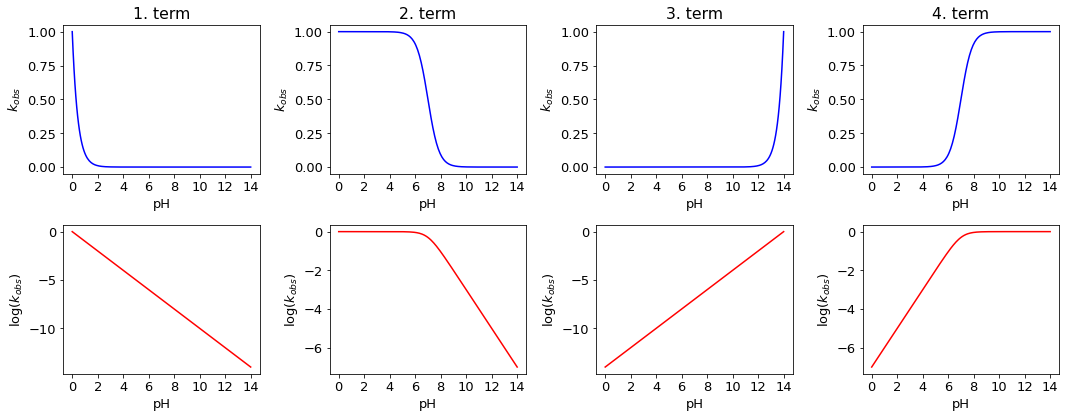

In [2]:
pKa = 7.0
pKw = 14

pH = np.linspace(0, pKw, 200)  # pH linear space from 0 to pKw

# calculate individual terms

k1 = 10 ** (-pH)
k2 = 1 / (1 + 10 ** (pH - pKa))
k3 = 10 ** (pH - pKw)
k4 = 1 / (1 + 10 ** (pKa - pH))

k = [k1, k2, k3, k4]

# calculate decadic logarithms

log_k = [np.log10(_k) for _k in k]

# plot the terms vs pH

plt.rcParams.update({'font.size': 13})

figure, axes = plt.subplots(2, 4, figsize=(15, 6))

for i, (ax, _k) in enumerate(zip(axes[0], k)):
    ax.plot(pH, _k, 'b')
    ax.set_title(f'{i+1}. term')
    ax.set_xlabel("pH")
    ax.set_ylabel("$k_{obs}$")
    ax.xaxis.set_major_locator(MultipleLocator(2))

for i, (ax, _log_k) in enumerate(zip(axes[1], log_k)):
    ax.plot(pH, _log_k, 'r')
    ax.set_xlabel("pH")
    ax.set_ylabel("log($k_{obs}$)")
    ax.xaxis.set_major_locator(MultipleLocator(2))

plt.tight_layout()
plt.show()